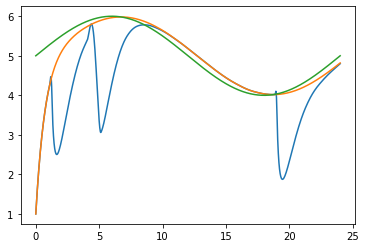

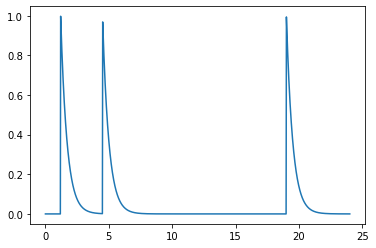

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

def drug_level(t, tau_list, d0=0, k=2.0):
    # t is time
    # tau_list is a list of times the drug is taken
    # k is the decay parameter for the drug
    doses = [np.exp(-k*(t-tau))*np.heaviside(t-tau, 0.5) for tau in tau_list]
    return d0*np.exp(-k*t)+np.sum(doses)

def delta(x, eps=1e-12):
    return 1/(eps*np.sqrt(np.pi))*np.exp(-(x/eps)**2)

def unmitigated(t):
    f = 1/24
    u = 5
    return np.sin(2*np.pi*t*f) + u

def painODE(t, y, u=unmitigated, k0=2*np.log(2), k1=4.0, k_decay=2.0, tau_list=[1.2, 4.5, 19]):
    #y = P(pain)
    dy = np.zeros(y.shape)
    dose = drug_level(t, tau_list, k=k_decay)
    dy[0] = -(k0+k1*dose)*y[0] + k0*u(t)
    dy[1] = -(k0)*y[1] + k0*u(t)
    return dy

t_range = [0, 24]
t_eval = np.linspace(t_range[0], t_range[1], 1000)
y0 = [1,1]
sol = integrate.solve_ivp(painODE, t_range, y0, t_eval=t_eval)
plt.plot(sol.t, sol.y[0, :])
plt.plot(sol.t, sol.y[1, :])
plt.plot(sol.t, unmitigated(sol.t))
plt.figure()
plt.plot(sol.t, [drug_level(t, [1.2, 4.5, 19]) for t in sol.t])